# Raport - Projekt 1 (Rachunek Macierzowy)
## Maciej Sikora, Marcin Świątkowski

### Etap 1
Importujemy potrzebne biblioteki oraz dwa pliki: jeden zawierający funkcje operacji na macierzach (multiplication_functions), drugi zliczający operacje (common).

In [149]:
import numpy as np
from pprint import pprint as pp
from multiplication_functions import *
from time import time_ns
from copy import copy as cp
from common import *
from matplotlib import pyplot as plt
import pandas as pd

### Etap 2
Ustalamy wykładnik potęgi oraz precyzję.

In [150]:
two_power = 3
percision = 10**(-10)

### Etap 3
Przygotowujemy miejsce na statystyki macierzy

In [151]:
SIZE_NORMAL = []
SIZE_STRASSEN = []

TIME_NORMAL = []
TIME_STRASSEN = []

OPCOUNT_NORMAL = []
OPCOUNT_STRASSEN = []

### Etap 4
Wyznaczamy które funkcje mają zostać wykonane (jakimi sposobami macierze mają zostać policzone)

In [152]:
functions = [mat_mul_normal, mat_mul_strassen]

### Etap 5
Wykonujemy mnożenie macierzy w oparciu o wskazane funkcje, a następnie je wyświetlamy w formie DataFrame'ów (z powodu problemów z czytelnością raportu, wyświetlone zostają tylko dwie pierwsze operacje).
Dodatkowo sprawdzamy czy policzone wartości są równe z tymi policzonymi przez bibliotekę przystosowaną do mnożenia macierzy (linijka 9). Poziom dokładności jest ustalony wyżej.

In [153]:
for two_power in range(2,10):
    for f in functions:
        A = np.random.rand(2**two_power,2**two_power)
        B = np.random.rand(2**two_power,2**two_power)

        start = time_ns()
        C, operation_count = f(A,B)
        mesured_time = time_ns() - start
        correct = np.allclose(A@B, np.array(C), atol = percision, rtol = 0)
        
        if two_power < 3:
            print('\n' + (45*'=') + '\nMatrix A\n', pd.DataFrame(A))
            print('\nMatrix B\n', pd.DataFrame(B))
            print('\nMatrix C\n', pd.DataFrame(C))
            print(f"\nSize: {2**two_power}, name: {f.__name__}, correct: {correct}, time: {mesured_time}, op_count: {operation_count}")

        
        if f.__name__=='mat_mul_normal':
            SIZE_NORMAL.append(2**two_power)
            TIME_NORMAL.append(mesured_time)
            OPCOUNT_NORMAL.append(operation_count)
        else:
            SIZE_STRASSEN.append(2**two_power)
            TIME_STRASSEN.append(mesured_time)
            OPCOUNT_STRASSEN.append(operation_count)


Matrix A
           0         1         2         3
0  0.055717  0.437671  0.167099  0.874466
1  0.249142  0.124101  0.129796  0.762199
2  0.898791  0.364159  0.715194  0.136720
3  0.705463  0.177788  0.653457  0.614085

Matrix B
           0         1         2         3
0  0.129052  0.784571  0.715247  0.900146
1  0.423760  0.979173  0.945769  0.002619
2  0.785795  0.946739  0.979978  0.810167
3  0.744807  0.215828  0.427715  0.095855

Matrix C
           0         1         2         3
0  0.975271  0.819203  0.991562  0.270499
1  0.754425  0.604373  0.748770  0.402807
2  0.934132  1.768350  1.746620  1.402529
3  1.137239  1.478761  1.575754  1.223758

Size: 4, name: mat_mul_normal, correct: True, time: 1000200, op_count: 372581344

Matrix A
           0         1         2         3
0  0.840638  0.449749  0.550408  0.394878
1  0.344745  0.052049  0.404606  0.348802
2  0.720054  0.619880  0.576095  0.495822
3  0.165652  0.742584  0.416244  0.930646

Matrix B
           0         1  

### Etap 6
Zapisujemy statystyki macierzy w pliku saved_results.txt.

In [154]:
with open('./saved_results.txt', 'w') as f:
    f.write("NORMAL\n")
    f.write(f"{','.join(list(map(str, SIZE_NORMAL)))}\n")
    f.write(f"{','.join(list(map(str, TIME_NORMAL)))}\n")
    f.write(f"{','.join(list(map(str, OPCOUNT_NORMAL)))}\n")
    f.write("\nSTRASSEM\n")
    f.write(f"{','.join(list(map(str, SIZE_STRASSEN)))}\n")
    f.write(f"{','.join(list(map(str, TIME_STRASSEN)))}\n")
    f.write(f"{','.join(list(map(str, OPCOUNT_STRASSEN)))}\n")

### Etap 7
Rysujemy wykresy liniowe dla obu sposobów liczenia macierzy z podziałem na wykresy czasy obliczania i liczby operacji.

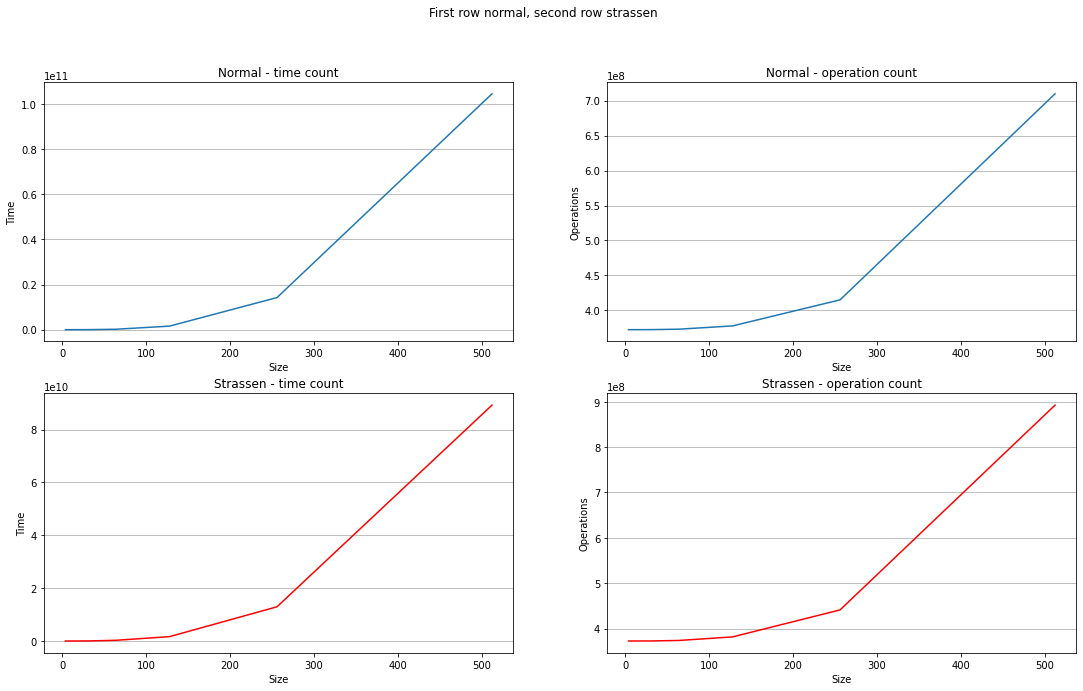

In [155]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('First row normal, second row strassen')
axs[0, 0].plot(SIZE_NORMAL, TIME_NORMAL)
axs[0, 0].set_title('Normal - time count')
axs[0, 0].set_xlabel("Size")
axs[0, 0].set_ylabel("Time")
axs[0, 0].grid(axis='y')

axs[0, 1].plot(SIZE_NORMAL, OPCOUNT_NORMAL)
axs[0, 1].set_title('Normal - operation count')
axs[0, 1].set_xlabel("Size")
axs[0, 1].set_ylabel("Operations")
axs[0, 1].grid(axis='y')

axs[1, 0].plot(SIZE_STRASSEN, TIME_STRASSEN, "r-")
axs[1, 0].set_title('Strassen - time count')
axs[1, 0].set_xlabel("Size")
axs[1, 0].set_ylabel("Time")
axs[1, 0].grid(axis='y')

axs[1, 1].plot(SIZE_STRASSEN, OPCOUNT_STRASSEN, "r-")
axs[1, 1].set_title('Strassen - operation count')
axs[1, 1].set_xlabel("Size")
axs[1, 1].set_ylabel("Operations")
axs[1, 1].grid(axis='y')

plt.show()

## Podsumowanie
Patrząc na rzędy wielkości możemy dostrzec, że algorytm Strassena wykonuje się szybciej, choć dokonuje nawet nieco większej liczby operacji. Użyteczność algorytmu Strassena rzeczywiście jednak okazuje się dopiero przy większych macierzach.

In [156]:
OPCOUNT_STRASSEN

[372581472,
 372583680,
 372601312,
 372737536,
 373775072,
 381635840,
 441150432,
 892486656]

In [157]:
OPCOUNT_NORMAL

[372581344,
 372582496,
 372591872,
 372666848,
 373261824,
 377969376,
 415190272,
 709585888]

In [158]:
TIME_STRASSEN

[0,
 1002000,
 4995200,
 32980500,
 265851700,
 1650041500,
 12943606200,
 89233018100]

In [159]:
TIME_NORMAL

[1000200,
 0,
 3997300,
 25983500,
 183133200,
 1574120200,
 14226851900,
 104505295700]

Analizując czasy wykonań algorytmu dla poszczególnych przypadków, należy zwrócić uwagę na narzędzia wykorzystane do wykonania zadania. Operacje są zaimplementowane w czystym Pythonie, który jest notorycznie wskazywany jako jeden z gorszych języków do zadań "ciężkich obliczeniowo". Już rozmiary problemów 2^10 * 2^10 są liczone w długim czasie. 

Rozwiązaniem tego problemu, przy założeniu, że nadal korzystamy z jednego z najwygodniejszych języków, jest wykorzystanie bibliotek stworzonych do tego typu obliczeń. Zaimplementowanie tych operacji w popularnej bibliotece NumPy zdecydowanie przyspieszyłoby faktyczne obliczenia, lecz ona ma już zaimplementowane swoje własne efektywne mnożenie macierzy.